# Projet Deep Learning: reconnaissance de carte

## Chargement des données

### Création du DataFrame et des 3 ensembles train, test et validation

In [37]:
import os
import pandas as pd

folder = "dataset/classes"

card_type = ["clubs", "diamonds", "hearts", "clubs"]
card_number = ["seven", "eight", "nine", "ten", "jack", "queen", "king", "ace"]
labels = [f"{n}_{t}" for n in card_number for t in card_type]
labels_to_idx = {labels[i]: i for i in range(len(labels))}

def get_dataframe_from_folder(folder, classes):
    """
    Create a dataframe containing information about the dataset from a folder.
    """
    df = pd.DataFrame(columns=["path", "number", "type", "label"])
    for label in classes:
        path_folder_label = os.path.join(folder, label)
        for img in os.listdir(path_folder_label):
            path = os.path.join(folder, label, img)
            s = label.split("_")
            card_number = s[0]
            card_type = s[1]
            df.loc[len(df)] = [path, card_number, card_type, label]
    return df
    

In [38]:
df = get_dataframe_from_folder(folder, labels)
df.head()

,path,number,type,label
0,dataset/classes/seven_clubs/seven_of_clubs_car...,seven,clubs,seven_clubs
1,dataset/classes/seven_clubs/seven_of_clubs_car...,seven,clubs,seven_clubs
2,dataset/classes/seven_clubs/seven_of_clubs_car...,seven,clubs,seven_clubs
3,dataset/classes/seven_clubs/seven_of_clubs_car...,seven,clubs,seven_clubs
4,dataset/classes/seven_clubs/seven_of_clubs_car...,seven,clubs,seven_clubs


In [39]:
def print_stat(df):
    """
    Print the total number of cards and the number of cards for each label.
    """
    print(f"Il y a {len(df)} cartes.")
    sorted_df = df.groupby('label').count().sort_values('path', ascending=False)["path"]
    print(sorted_df)

print_stat(df)

Il y a 1469 cartes.
label
ace_clubs         124
jack_clubs        106
king_clubs         94
queen_clubs        92
nine_clubs         84
ten_clubs          82
eight_clubs        78
ace_hearts         71
ace_diamonds       68
seven_clubs        60
king_diamonds      55
jack_diamonds      50
jack_hearts        49
queen_diamonds     48
ten_hearts         46
queen_hearts       45
eight_hearts       45
ten_diamonds       44
nine_hearts        43
king_hearts        42
seven_hearts       40
nine_diamonds      38
seven_diamonds     33
eight_diamonds     32
Name: path, dtype: int64


In [40]:
import math

def split_train_test_validation(df, ratio=[0.70, 0.15, 0.15], seed=10):
    """
    Split the dataframe in 3 dataframe (train, test and validation)
    """
    n = len(df)
    df = df.sample(n=n, random_state=seed)
    last_train = math.floor(n * ratio[0])
    last_test = last_train + 1 + math.floor(n * ratio[1])
    df_train = df[0:last_train]
    df_test = df[last_train:last_test]
    df_val = df[last_test:]
    n_train = len(df_train)
    n_test = len(df_test)
    n_val = len(df_val)
    print(f"train: {n_train}, test: {n_test}, val: {n_val}, tot: {n_train + n_test + n_val}")
    return df_train, df_test, df_val

df_train, df_test, df_val = split_train_test_validation(df)

train: 1028, test: 221, val: 220, tot: 1469


### Chargement des images

In [62]:
import numpy as np
import PIL
from PIL import Image

def load_data(df, labels_to_idx, image_size=128):
    n = len(df)
    x = np.zeros((n, image_size, image_size, 3))
    y = np.zeros((n, 1))

    index = 0
    for _, row in df.iterrows():
        img = Image.open(row["path"])
        img = img.convert('RGB')
        img = img.resize((image_size, image_size))
        x[index] = np.asarray(img)
        y[index] = labels_to_idx[row["label"]]
        index += 1
    return x, y


In [63]:
x_train, y_train = load_data(df_train, labels_to_idx)
print(x_train.shape, y_train.shape)

(1028, 128, 128, 3) (1028, 1)


In [64]:
x_test, y_test = load_data(df_test, labels_to_idx)
print(x_test.shape, y_test.shape)

(221, 128, 128, 3) (221, 1)


In [65]:
x_val, y_val = load_data(df_val, labels_to_idx)
print(x_val.shape, y_val.shape)

(220, 128, 128, 3) (220, 1)


### Visualisation des données

/tmp/ipykernel_64585/1456977099.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels[int(y[shuffle_indices[i]])])


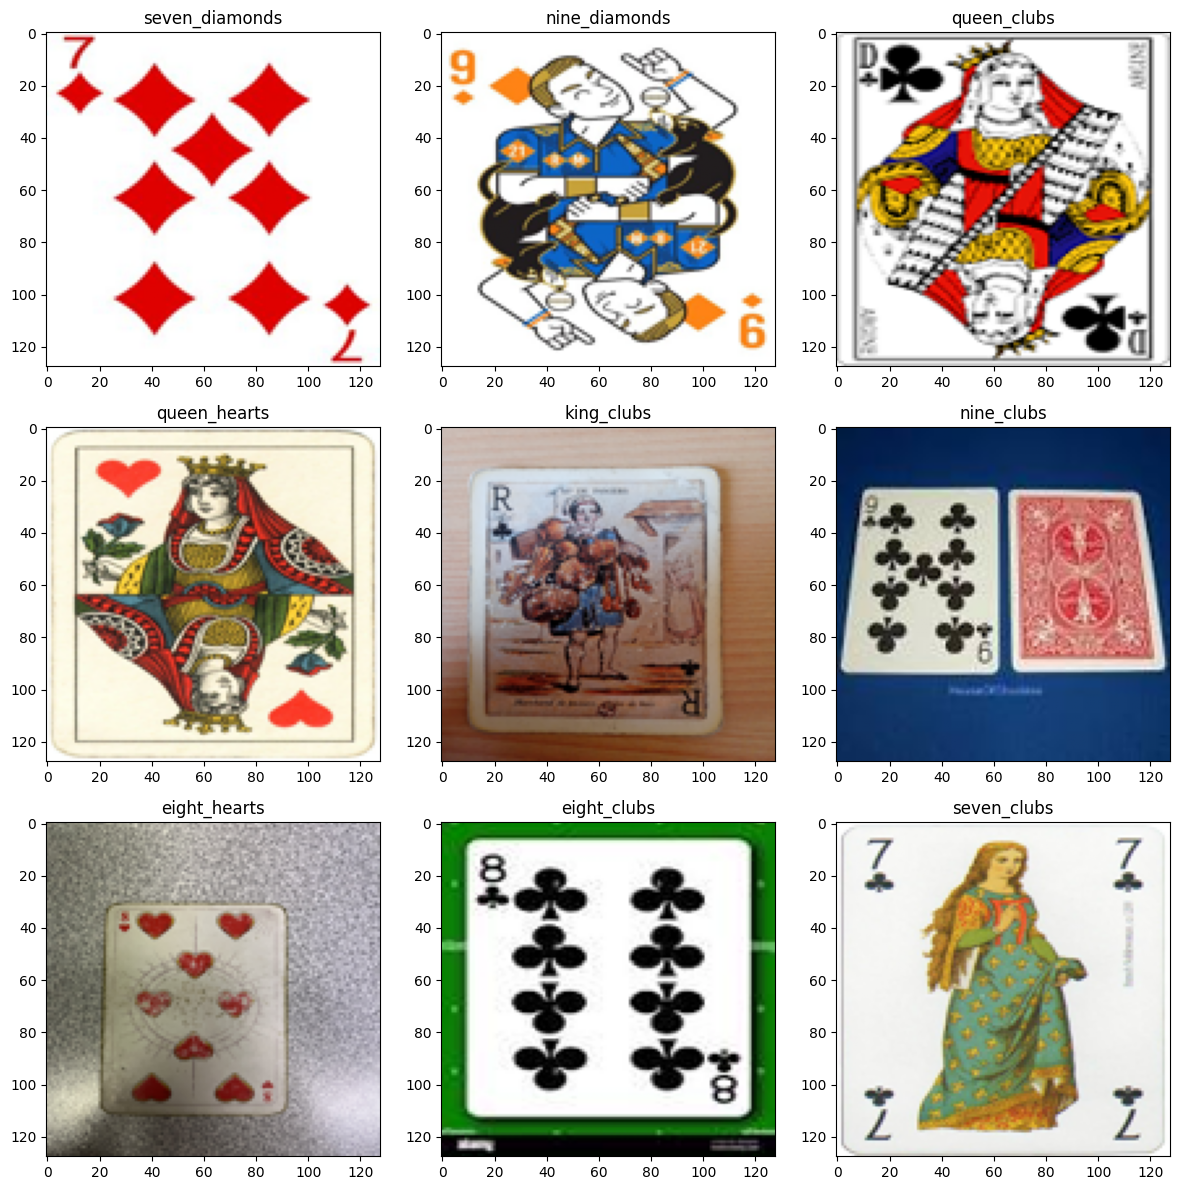

In [67]:
import matplotlib.pyplot as plt

def show_imgs(x, y, labels):
    plt.figure(figsize=(12,12))
    shuffle_indices = np.random.permutation(x.shape[0])
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img = x[shuffle_indices[i]]
        plt.title(labels[int(y[shuffle_indices[i]])])
        plt.imshow(img/255)
    plt.tight_layout()
    plt.show()

show_imgs(x_train, y_train, labels)